In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Unsupervised learning: basics

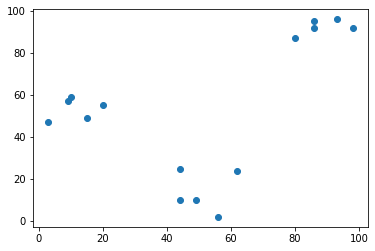

In [2]:
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]
plt.scatter(x_coordinates, y_coordinates)
plt.show()

### Exercise: Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

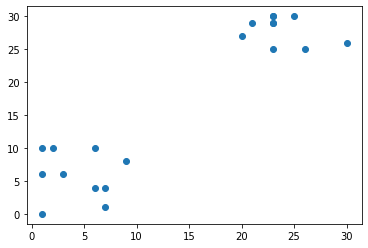

In [3]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

That is correct! Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Basics of cluster analysis

### Hierarchical clustering in scipy

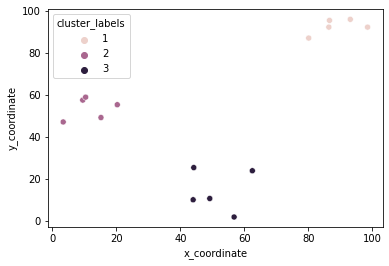

In [4]:
from scipy.cluster.hierarchy import linkage, fcluster

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 
                   'y_coordinate': y_coordinates})

Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

### K-means clustering in scipy

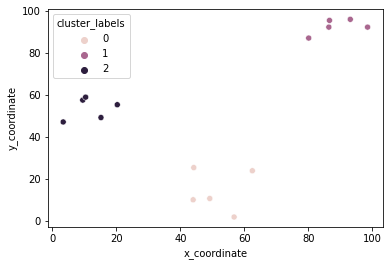

In [5]:
from scipy.cluster.vq import kmeans, vq
import random
random.seed((1000, 2000))

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 
                   'y_coordinate': y_coordinates})

centroids, _ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

### Exercise: Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

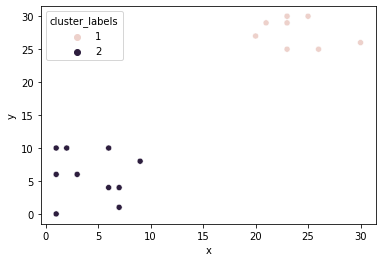

In [6]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

df = pd.DataFrame({'x': x, 'y': y})

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

You are correct! Notice that the cluster labels are plotted with different colors. ~~You will notice that the resulting plot has an extra cluster labelled 0 in the legend. This will be explained later in the course.~~

### Exercise: Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

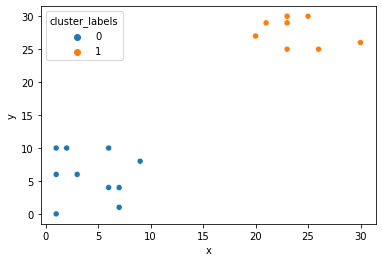

In [7]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

df = pd.DataFrame({'x': x, 'y': y}).astype('float')

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

You are correct! Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.

## Data preparation for cluster analysis

### Why do we need to prepare data for clustering?
- Variables have incomparable units (product dimensions in cm, price in $)
- Variables with same units have vastly di(erent scales and variances (expenditures on cereals, travel)
- Data in raw form may lead to bias in clustering
- Clusters may be heavily dependent on one variable
- Solution: normalization of individual variables

### Normalization of data
- Normalization: process of rescaling data to a standard deviation of 1
- x_new = x / std_dev(x)

In [8]:
from scipy.cluster.vq import whiten

data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)
scaled_data

array([2.72733941, 0.54546788, 1.63640365, 1.63640365, 1.09093577,
       1.63640365, 1.63640365, 4.36374306, 0.54546788, 1.09093577,
       1.09093577, 1.63640365, 2.72733941])

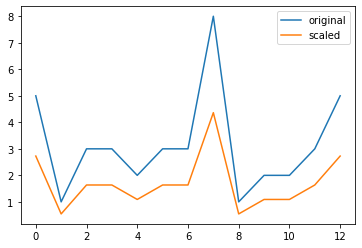

In [9]:
# Initialize original, scaled data
plt.plot(data, label='original')
plt.plot(scaled_data, label='scaled')

# Show legend and display plot
plt.legend()
plt.show()

### Exercise: Normalize basic list data
Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

In [10]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


That is right! Notice the scaled values have less variations in them. You will now visualize the data in the next exercise.

### Exercise: Visualize normalized data
After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

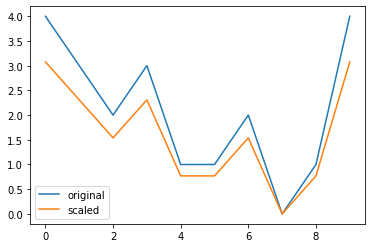

In [11]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

That is right! Notice the scaled values have lower variations in them.

### Exercise: Normalization of small numbers
In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

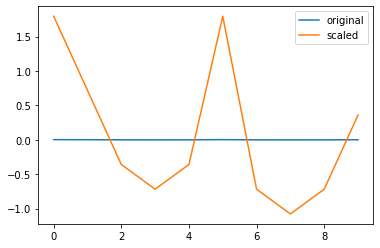

In [12]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

That is right! Notice how the changes in the original data are negligible as compared to the scaled data

### Exercise: FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a pandas DataFrame, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

In [13]:
fifa = pd.read_csv('fifa_18_sample_data.csv')

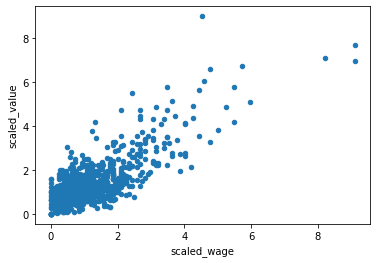

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [14]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

That is right! As you can see the scaled values have a standard deviation of 1.